# Generating Data

## Sinusoidal movement

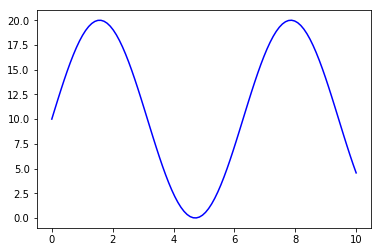

In [32]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

origin = 0
samples = 100
map_length = 10 #[m]
# generate x values representing movement in x-direction
x = np.linspace(origin, map_length, samples)
# generate y values 
y = np.sin(x)*map_length
y = [item+map_length for item in y] # shift to contain only positive values

# generate 2-dimensional plot
plt.plot(x, y,'blue')
plt.show()

### Adding noise

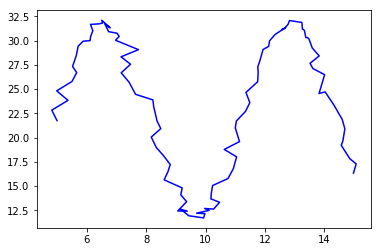

In [33]:
# generate Gaussian noise
mean_x, mean_y = np.mean(x), np.mean(y)
noise_x = np.random.normal(mean_x, 0.2, samples)
noise_y = np.random.normal(mean_y, 0.2, samples)
# add noise to x and y values
noisy_x = x + noise_x
noisy_y = y + noise_y

# generate 2-dimensional plot
plt.plot(noisy_x, noisy_y, 'blue')
plt.show()

### Export to CSV